# Lab 8
# Mariah Noelle Cornelio


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [1]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [2]:
filename="/Users/marielle/Desktop/3402_Python2/Labs/Lab 7/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

In [8]:
# !pip install -U scikit-learn

!python -m pip show scikit-learn # to see which version and where scikit-learn is installed
!python -m pip freeze # to see all packages installed in the active virtualenv
!python -c "import sklearn; sklearn.show_versions()"

Name: scikit-learn
Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /Users/marielle/anaconda3/lib/python3.11/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn
aiobotocore @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_71xswk40o_/croot/aiobotocore_1682537536268/work
aiofiles @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_f56ag8l7kr/croot/aiofiles_1683773599608/work
aiohttp @ file:///Users/cbousseau/work/recipes/ci_py311/aiohttp_1677926054700/work
aioitertools @ file:///tmp/build/80754af9/aioitertools_1607109665762/work
aiosignal @ file:///tmp/build/80754af9/aiosignal_1637843061372/work
aiosqlite @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_3d75lecab1/croot/aiosqlite_1683773918307/work
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anacon


System:
    python: 3.11.4 (main, Jul  5 2023, 08:54:11) [Clang 14.0.6 ]
executable: /Users/marielle/anaconda3/bin/python
   machine: macOS-11.7.10-arm64-arm-64bit

Python dependencies:
      sklearn: 1.3.0
          pip: 23.2.1
   setuptools: 68.0.0
        numpy: 1.24.3
        scipy: 1.10.1
       Cython: None
       pandas: 1.5.3
   matplotlib: 3.7.1
       joblib: 1.2.0
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: /Users/marielle/anaconda3/lib/libopenblasp-r0.3.21.dylib
         prefix: libopenblas
       user_api: blas
   internal_api: openblas
        version: 0.3.21
    num_threads: 8
threading_layer: pthreads
   architecture: armv8

       filepath: /Users/marielle/anaconda3/lib/libomp.dylib
         prefix: libomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 8


### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


In [ ]:
# Exercise 2 Part A
## I browsed through the classification algorithms

In [9]:
# Exercise 2 Part B
## I read through the linear model codes

In [ ]:
# Exercise 2 Part C
## This is cool

### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [3]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [11]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


In [18]:
print("X_Train shape:", X_Train.shape)
print("y_Train shape:", y_Train.shape)

X_Train shape: (4000000, 18)
y_Train shape: (4000000,)


We can train the classifier as follow:

In [19]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

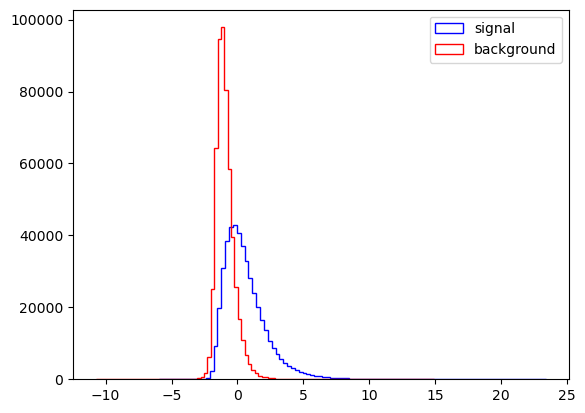

In [20]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

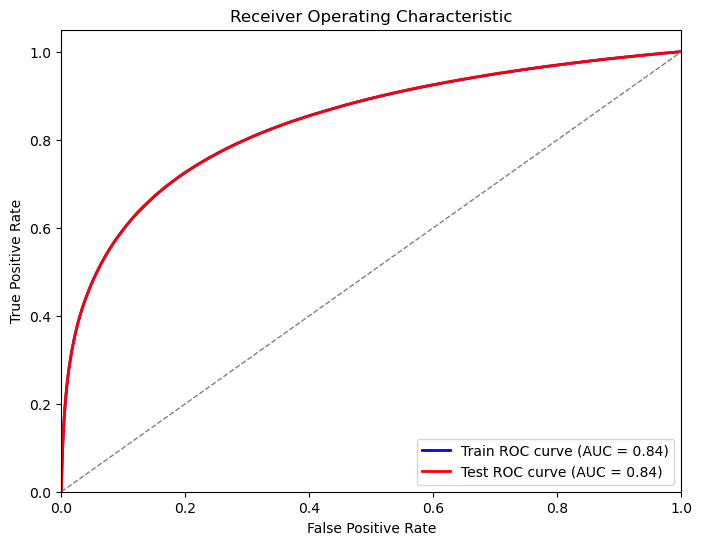

In [21]:
import sklearn.discriminant_analysis as DA
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

Fisher=DA.LinearDiscriminantAnalysis() # This creates a LDA object 
Train_Sample=df[:N_Train] # Training set
Test_Sample=df[N_Train:] # Testing set

# For the training set
X_Train=Train_Sample[VarNames[1:]] # This takes the features
y_Train=Train_Sample["signal"] # This is the target variable "signal"

# For the testing set
X_Test=Test_Sample[VarNames[1:]] # This takes the features
y_Test=Test_Sample["signal"] # This is the target variable 

Fisher.fit(X_Train, y_Train) # Fits the LDA model with the training sets

# Probabilities for training and testing set samples
probs_train = Fisher.predict_proba(X_Train)[:, 1]
probs_test = Fisher.predict_proba(X_Test)[:, 1]

fpr_train, tpr_train, _=roc_curve(y_Train, probs_train) # Calculates ROC curve (like Dr. Farbin's code)
roc_auc_train=auc(fpr_train, tpr_train) # Code to calculate AUC curve for training

fpr_test, tpr_test, _=roc_curve(y_Test, probs_test) # ROC curve for testing
roc_auc_test=auc(fpr_test, tpr_test) # AUC curve for testing

# Plots ROC and AUC curves
plt.figure(figsize=(8, 6))
# The training curve
plt.plot(fpr_train, tpr_train, color="blue", lw=2, label="Train ROC curve (AUC = %0.2f)" % roc_auc_train)
# Testing curve
plt.plot(fpr_test, tpr_test, color="red", lw=2, label="Test ROC curve (AUC = %0.2f)" % roc_auc_test)
# Diagonal line
plt.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()


#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

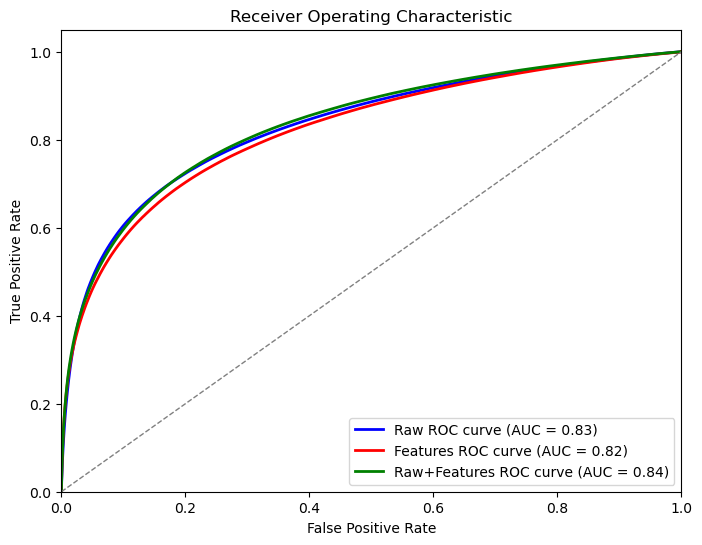

In [23]:
import sklearn.discriminant_analysis as DA
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

VarNames=["signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel",
            "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
RawNames=["l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

X_raw=df[RawNames] # Take raw features
y=df["signal"]
X_features=df[FeatureNames] # Features
X_raw_and_features = df[VarNames[1:]] # Raw+features

# Perform LDA on raw, features, and raw+features
Fisher_raw=DA.LinearDiscriminantAnalysis()
Fisher_features=DA.LinearDiscriminantAnalysis()
Fisher_raw_and_features=DA.LinearDiscriminantAnalysis()

# Fit (train) them
Fisher_raw.fit(X_raw, y)
Fisher_features.fit(X_features, y)
Fisher_raw_and_features.fit(X_raw_and_features, y)

# Probabilities
probs_raw=Fisher_raw.predict_proba(X_raw)[:, 1]
probs_features=Fisher_features.predict_proba(X_features)[:, 1]
probs_raw_and_features=Fisher_raw_and_features.predict_proba(X_raw_and_features)[:, 1]

# ROC and AUC curves for raw, features, and raw+features
fpr_raw, tpr_raw, _=roc_curve(y, probs_raw)
roc_auc_raw=auc(fpr_raw, tpr_raw)
fpr_features, tpr_features, _=roc_curve(y, probs_features)
roc_auc_features=auc(fpr_features, tpr_features)
fpr_raw_and_features, tpr_raw_and_features, _=roc_curve(y, probs_raw_and_features)
roc_auc_raw_and_features=auc(fpr_raw_and_features, tpr_raw_and_features)

# Plot ROC curves
plt.figure(figsize=(8, 6))
# For raw
plt.plot(fpr_raw, tpr_raw, color='blue', lw=2, label='Raw ROC curve (AUC = %0.2f)' % roc_auc_raw)
# Features
plt.plot(fpr_features, tpr_features, color='red', lw=2, label='Features ROC curve (AUC = %0.2f)' % roc_auc_features)
# Raw+features
plt.plot(fpr_raw_and_features, tpr_raw_and_features, color='green', lw=2, label='Raw+Features ROC curve (AUC = %0.2f)' % roc_auc_raw_and_features)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# The best fit would be the raw+features ROC curve because it has a AUC=0.84 which is closer to 1

### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part b to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

In [ ]:
# Exercise 4 Part A

## For this, I will choose logistic regression, decision tree classification, and
## K nearest neighbors classification (I looked up what was the fastest for the dataset)

In [8]:
# Exercise 4 Part B

import sklearn.linear_model as LM # logistic regression
import sklearn.tree as tree # decision tree
import sklearn.neighbors as NN # nearest neighbors
import sklearn.metrics as metrics

def compare_roc(classifier, X, y):
    classifier.fit(X, y) # this fits/traints the classifier we want to use
    probs=classifier.predict_proba(X)[:, 1] # predicts the probabilities of the test
    fpr, tpr, _=metrics.roc_curve(y, probs) # calculates ROC curve
    roc_auc=metrics.auc(fpr, tpr) # calculates AUC curve

    return fpr, tpr, roc_auc

# Setting the classifiers I chose
decision_tree=tree.DecisionTreeClassifier()
logistic_regression=LM.LogisticRegression()
knn_classifier=NN.KNeighborsClassifier()

classifiers=[
    decision_tree,
    logistic_regression,
    knn_classifier
]

# Titles of classifiers for my plot
classifier_names=[
    "Decision Tree",
    "Logistic Regression",
    "K-Nearest Neighbors"
]

all_fprs, all_tprs, all_aucs=[], [], [] # This still store my results


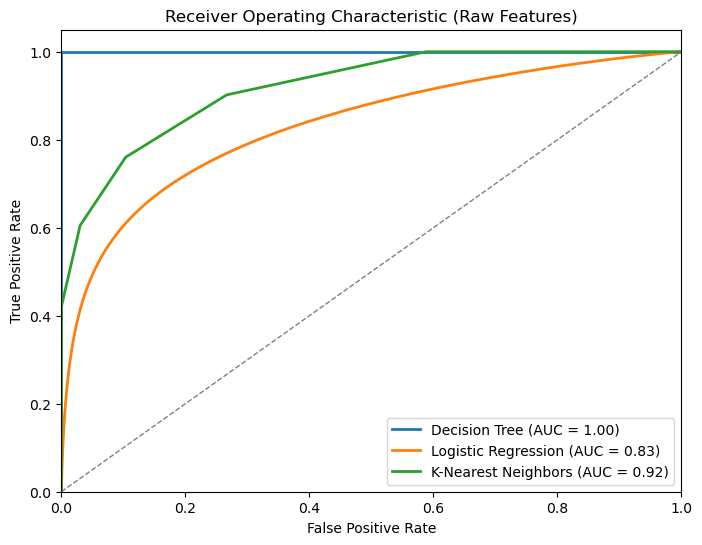

In [9]:
# Graphs ROC and AUC curves of the classifiers (using raw data, I wasn't sure if I was)
# supposed to do raw, features, and raw+features but this took a very long time to load and re-do
# so I just did raw

plt.figure(figsize=(8, 6))
for classifier, name in zip(classifiers, classifier_names):
    fpr, tpr, roc_auc=compare_roc(classifier, X_raw, y) # compares
    all_fprs.append(fpr)
    all_tprs.append(tpr)
    all_aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, label="%s (AUC = %0.2f)" % (name, roc_auc))

plt.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (Raw Features)")
plt.legend(loc="lower right")
plt.show()

# The best one is the decision tree because the AUC = 1

In [19]:
# When I said I didn't know if I had to use raw, features, raw+features and only used X_raw, 
# the code did not work because the features in X_raw and X_Test did not match so this is the code
# to make X_raw into X_test

print("Number of features in X_raw:", X_raw.shape[1])
print("Number of features in X_test:", X_Test.shape[1])
print("Feature names in X_raw:", X_raw.columns.tolist())
print("Feature names in X_test:", X_Test.columns.tolist())
missing_features=['MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1']

for feature in missing_features:
    X_raw[feature]=0

X_raw=X_raw[X_Test.columns]



Number of features in X_raw: 8
Number of features in X_test: 18
Feature names in X_raw: ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 'MET', 'MET_phi']
Feature names in X_test: ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 'MET', 'MET_phi', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1']


/var/folders/q4/414ry47d1hv7zj62ggf6vkz40000gn/T/ipykernel_7800/3382090693.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_raw[feature] = 0  # Add the missing features with default value 0
/var/folders/q4/414ry47d1hv7zj62ggf6vkz40000gn/T/ipykernel_7800/3382090693.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_raw[feature] = 0  # Add the missing features with default value 0
/var/folders/q4/414ry47d1hv7zj62ggf6vkz40000gn/T/ipykernel_7800/3382090693.py:14: SettingWithCopyWarning: 
A value is tr

In [21]:
# Exercise 4 Part C

## Decision tree is the best one because the AUC=1. The next best would be K-nearest neighbors
## and then logistic regression. 

import numpy as np

def compute_significance(N_S, N_B):
    return N_S / np.sqrt(N_S + N_B)

scenarios=[
    (10, 100),
    (100, 1000),
    (1000, 10000),
    (10000, 100000)
]

decision_tree=tree.DecisionTreeClassifier()

# Same thing we did before for fitting/training, predicting probabilities but the only difference
# is that we are now computing the significance using the true and false positive values
for N_S, N_B in scenarios:
    print(f"\nScenario: N_S = {N_S}, N_B = {N_B}")
    decision_tree.fit(X_raw, y) 
    probs=decision_tree.predict_proba(X_Test)[:, 1]
    y_pred=(probs>0.5).astype(int)
    true_positives=np.sum((y_Test==1) & (y_pred==1))
    false_positives=np.sum((y_Test==0) & (y_pred==1))

    significance=compute_significance(true_positives, false_positives)
    print(f"Decision Tree: Significance = {significance:.4f}")



Scenario: N_S = 10, N_B = 100
Decision Tree: Significance = 676.9291

Scenario: N_S = 100, N_B = 1000
Decision Tree: Significance = 676.9291

Scenario: N_S = 1000, N_B = 10000
Decision Tree: Significance = 676.9291

Scenario: N_S = 10000, N_B = 100000
Decision Tree: Significance = 676.9291


### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

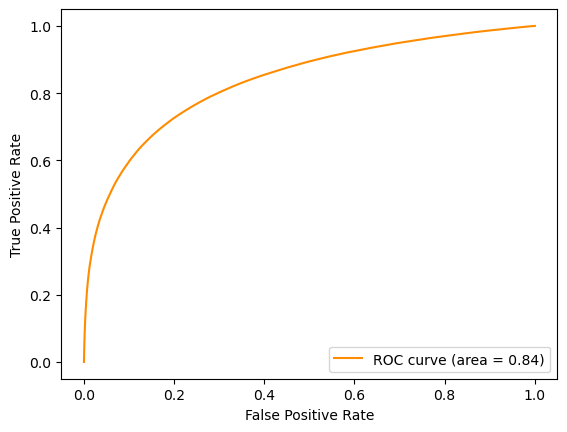

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc

Fisher=LinearDiscriminantAnalysis()
Fisher.fit(X_Train, y_Train)

fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()



#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance. 


In [ ]:
# Exercise 5 Part A
## I read

In [26]:
# Exercise 5 Part B
# I did not know how to do this part so I looked it up but I will try explaining the code to the
# best of my abilities

import pandas as pd
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score

def compute_max_significance(N_S, N_B): # This function finds the maximum significance value
    return N_S / np.sqrt(N_S + N_B)

# This creates a dataframe to store the results
results = pd.DataFrame(columns=['Scenario', 'TPR', 'FPR', 'AUC', 'Precision', 'Recall', 'F1 Score', 'Accuracy', 'Max Significance'])

# I am still using the decision tree for this one because it was the best one with a AUC curve of 1
for i, (N_S, N_B) in enumerate(scenarios):
    decision_tree.fit(X_Train, y_Train) # Same thing as before with this training/fitting the classifier
    y_pred = decision_tree.predict(X_Test) # This makes the predictions
    
    # This part computes all the TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy
    # for my decision tree model for each scenario
    fpr, tpr, _ = roc_curve(y_Test, y_pred)
    roc_auc = auc(fpr, tpr)
    precision = precision_score(y_Test, y_pred)
    recall = recall_score(y_Test, y_pred)
    f1 = f1_score(y_Test, y_pred)
    accuracy = accuracy_score(y_Test, y_pred)

    max_significance = compute_max_significance(N_S, N_B) # This finds the max significance for each scenario

    results.loc[i] = [f"Scenario {i+1}", tpr, fpr, roc_auc, precision, recall, f1, accuracy, max_significance] # This will add the results to my dataframe

print(results)


     Scenario                             TPR  \
0  Scenario 1  [0.0, 0.6954889761322297, 1.0]   
1  Scenario 2  [0.0, 0.6952358298071069, 1.0]   
2  Scenario 3    [0.0, 0.69515290256267, 1.0]   
3  Scenario 4   [0.0, 0.695076522205952, 1.0]   

                               FPR       AUC  Precision    Recall  F1 Score  \
0  [0.0, 0.26703730570522016, 1.0]  0.714226   0.687782  0.695489  0.691614   
1  [0.0, 0.26670136793123245, 1.0]  0.714267   0.687974  0.695236  0.691586   
2   [0.0, 0.2670982174994047, 1.0]  0.714027   0.687629  0.695153  0.691370   
3   [0.0, 0.2672588031386186, 1.0]  0.713909   0.687476  0.695077  0.691255   

   Accuracy  Max Significance  
0  0.715791          0.953463  
1  0.715857          3.015113  
2  0.715604          9.534626  
3  0.715482         30.151134  
